In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### 1. 문제정의
- 500명의 키와 몸무게, 비만도 라벨을 통해서 비만을 판단하는 모델을 만들어보자

### 2. 데이터 수집
- bmi_500.csv 불러오기

In [6]:
data = pd.read_csv('bmi_500.csv',
           index_col = 'Label' # label컬럼 인덱스로 만들기
           )
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [16]:
# 인덱서를 사용해서
# 인덱서 : 데이터 프레임에서 행 or 열단위로 데이터를 불러올 때 사용하는 함수
# loc인덱서 : [행,열]-> 행과 열에 대한 이름 기입 ex) data.lco['Overweight','Height']
# iloc인덱서 : [행,열] -> 행과 열에 대한 번호 기입 ex) data.iloc[3, 1]
# label이 normal 인것만 출력하기
data.loc['Normal', : ] # : 은 전체라는 의미

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


### 3. 데이터 전처리

In [18]:
# 결측치, 데이터 타입 확인 -> info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [22]:
# 기술통계 확인, 이상치의 여부
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 4. 탐색적 데이터 분석(EDA)
- 각 비만도 등급별로 시각화

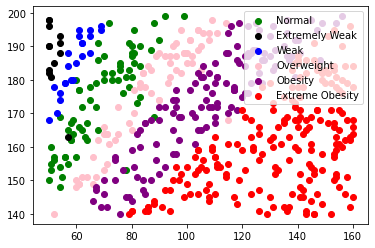

In [38]:
data_normal = data.loc['Normal', : ]
plt.scatter(data_normal['Weight'], # X축 데이터
            data_normal['Height'], # y축 데이터
            c = 'green',
            label = 'Normal')
plt.legend(loc = 'upper right') # 우측 상단에 label 띄우기
data_extremely_weak = data.loc['Extremely Weak', : ]
plt.scatter(data_extremely_weak['Weight'],
            data_extremely_weak['Height'],
            c = 'black',
            label = 'Extremely Weak')
plt.legend(loc = 'upper right')

data_weak = data.loc['Weak', : ]
plt.scatter(data_weak['Weight'],
            data_weak['Height'],
            c = 'blue',
            label = 'Weak')
plt.legend(loc = 'upper right')

data_overweight = data.loc['Overweight', : ]
plt.scatter(data_overweight['Weight'],
            data_overweight['Height'],
            c = 'pink',
            label = 'Overweight')
plt.legend(loc = 'upper right')

data_obesity = data.loc['Obesity', : ]
plt.scatter(data_obesity['Weight'],
            data_obesity['Height'],
            c = 'purple',
            label = 'Obesity')
plt.legend(loc = 'upper right')

data_extreme_obesity = data.loc['Extreme Obesity', : ]
plt.scatter(data_extreme_obesity['Weight'],
            data_extreme_obesity['Height'],
            c = 'red',
            label = 'Extreme Obesity')
plt.legend(loc = 'upper right')

plt.show()

In [37]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [41]:
# 함수로 지정해서 코드의 길이를 줄이는 방법
def drawScatter(label, color): # def -> 함수로 지정
    data_scatter = data.loc[label, : ] 
    plt.scatter(data_scatter['Weight'], # X축 데이터
                data_scatter['Height'], # y축 데이터
                c = color,
                label = label) # 앞 label -> 속성, 뒤 label -> 변수 이름
    # 하나의 셀에서 원하는 문자를 한번에 바꾸는 기능 : esc로 나가서 F키 누르기

Text(0, 0.5, 'Height')

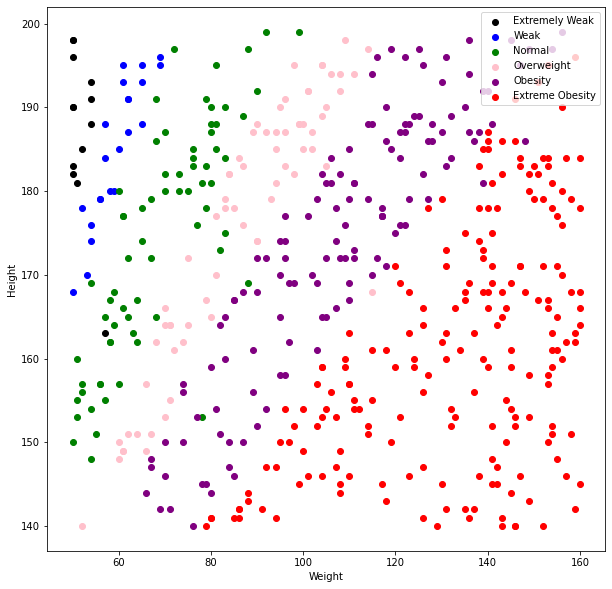

In [50]:
# 'Obesity', 'Normal', 'Overweight',
# 'Extreme Obesity', 'Weak', 'Extremely Weak'
plt.figure(figsize = (10, 10)) # 그래프 크기
drawScatter('Extremely Weak', 'black')
drawScatter('Weak', 'blue')
drawScatter('Normal', 'green')
drawScatter('Overweight', 'pink')
drawScatter('Obesity', 'purple')
drawScatter('Extreme Obesity', 'red')
plt.legend(loc='upper right')
plt.xlabel('Weight') # X축 이름 : Weight
plt.ylabel('Height') # y축 이름 : Height

### 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [56]:
# 문제 / 정답으로 데이터 분리
# 문제(X) / 정답(y)
data = pd.read_csv('bmi_500.csv')
data.head()
X = data.loc[:, 'Height':'Weight']
y = data.loc[:, 'Label']

In [57]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [58]:
# 훈련 / 평가로 데이터 분리
#  70 /  30
# 350 / 150

X_train = X.iloc[:350, : ]
X_test = X.iloc[350: , : ]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [59]:
# knn 모델 사용
knn = KNeighborsClassifier(n_neighbors = 7)

### 6. 학습

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### 7. 평가

In [81]:
print('train score (훈련 점수) : ', knn.score(X_train, y_train))
print('test score (테스트 점수) : ', knn.score(X_test, y_test))

train score (훈련 점수) :  0.9028571428571428
test score (테스트 점수) :  0.9


In [82]:
knn.predict([[174, 67], [180, 80]])

array(['Normal', 'Overweight'], dtype=object)